# Engenharia de Software para Ciência de Dados - PUC-Rio

### Ensembles
Marcos Kalinowski e Tatiana Escovedo

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.pipeline import Pipeline # para o pipeline

# Bibliotecas dos algoritmos de ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do dataset

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Informa o cabeçalho das colunas
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=0, delimiter=',')

## Particionamento em conjuntos de treino e teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# separando os atributos e a classe do dataset
array = dataset.values
X = array[:,0:8]
Y = array[:,8]

# definindo o tamanho do conjunto de teste
test_size = 0.20 

# A semente (seed) pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
# Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
seed = 7

# particionando em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


## Validação Cruzada e Métricas de avaliação

* Validação Cruzada: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* Métricas de avaliação: http://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# definindo a métrica de avaliação dos algoritmos
scoring = 'accuracy'
# scoring = 'roc_auc'

n_splits=10
kfold = KFold(n_splits=n_splits)

## Ensembles

### Bagging

#### Bagging com Árvores de Decisão
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Vamos usar o classificador BaggingClassifier com modelos CART, criando um total de 100 árvores.

In [ ]:
base = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=base, n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.7506345848757271


Também podemos usar outro modelo com o Bagging, como o KNN.

In [ ]:
base = KNeighborsClassifier()

model = BaggingClassifier(base_estimator=base, n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.7102591221575886


#### Random Forest e Extra Tree Classifier
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Para ambos os modelos ensemble, usaremos 100 árvores e pontos de divisão escolhidos com uma seleção randômica de 3 atributos.

In [ ]:
num_trees = 100
max_features = 3

In [ ]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed) 
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.7556848228450556


In [ ]:
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed) 
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.7427551560021153


### Boosting

#### Adaboost
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Iremos criar um modelo AdaBoost para classificação usando a classe AdaBoostClassifier. Serão construídas 100 árvores de decisão em sequência usando o algoritmo AdaBoost. O AdaBoost pode ser utilizado com vários modelos base, mas quando o parâmetro base_estimator não é passado, ele usa o DecisionTreeClassifier como padrão.

In [ ]:
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.7328926493918562


#### Gradient Boosting
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Iremos criar um modelo Gradient Boosting para classificação usando a classe GradientBoostingClassifier. Serão construídas 100 árvores de decisão em sequência usando o algoritmo Gradient Boosting.

In [ ]:
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean()) 

0.7458223162347964


### Voting Ensemble

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

Iremos criar um ensemble de votação para classificação usando a classe VotingClassifier. Serão combinadas as predições KNN, CART e SVM para o mesmo problema.

In [ ]:
# criando os modelos
bases = []
model1 = KNeighborsClassifier(metric='manhattan', n_neighbors=13)
bases.append(('knn', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC(C=0.5, kernel='linear')
bases.append(('svm', model3))

# criando o ensemble
model = VotingClassifier(bases)
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.7686144896879956


### Comparando o desempenho dos modelos

CART: 0.687335 (0.052398)
MelhorSVM: 0.776838 (0.061751)
Bagging: 0.747462 (0.050049)
RF: 0.755685 (0.060548)
ET: 0.742755 (0.068084)
Ada: 0.732893 (0.057126)
GB: 0.745822 (0.081214)
Voting: 0.768641 (0.063150)
ScaledCART: 0.669355 (0.051323)
ScaledSVM: 0.778451 (0.061394)
ScaledBagging: 0.747462 (0.050049)
ScaledRF: 0.755685 (0.060548)
ScaledET: 0.742755 (0.068084)
ScaledAda: 0.731280 (0.056156)
ScaledGB: 0.745822 (0.081214)
ScaledVoting: 0.762057 (0.064701)




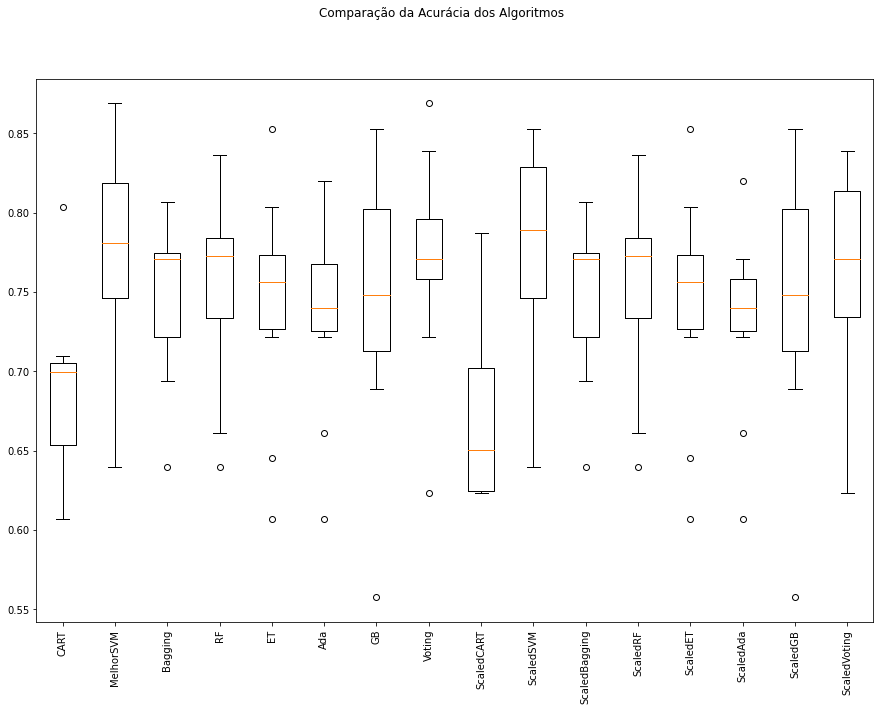

In [ ]:
np.random.seed(7) # definindo uma seed global

# definindo os parâmetros do classificador base
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# criando os modelos para o VotingClassifier
bases = []
model1 = KNeighborsClassifier(metric='manhattan', n_neighbors=13)
bases.append(('knn', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC(C=0.5, kernel='linear')
bases.append(('svm', model3))

# preparando os modelos
models = []
models.append(('CART', DecisionTreeClassifier())) # CART padrão
models.append(('MelhorSVM', SVC(C=0.5, kernel='linear'))) # o melhor SVM que encontramos na aula de Clasificação
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees, random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('Voting', VotingClassifier(bases)))

models.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
models.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC(C=0.5, kernel='linear'))])))
models.append(('ScaledBagging', Pipeline([('Scaler', StandardScaler()), ('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees, random_state=seed))])))
models.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed))])))
models.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed))])))
models.append(('ScaledAda', Pipeline([('Scaler', StandardScaler()), ('Ada', AdaBoostClassifier(n_estimators=num_trees, random_state=seed))])))
models.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingClassifier(n_estimators=num_trees, random_state=seed))])))
models.append(('ScaledVoting', Pipeline([('Scaler', StandardScaler()), ('Voting', VotingClassifier(bases))])))

# avaliando um modelo por vez
results = []
names = []
scoring = 'accuracy'
folds = 10

for name, model in models:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)

print("\n")

# boxplot de comparação dos algoritmos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação da Acurácia dos Algoritmos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.xticks(rotation=90)
plt.show()

### Desafio

Tente encontrar um modelo melhor que o melhor SVM que encontramos, usando a parametrização de ensembles.